# **ETPoF** Homework 3
Annemarie Linnenbank & Tommie Verouden

*22 March 2024*

In [ ]:
# Ensure the module is automatically reloaded when rerunning the import command.
%load_ext autoreload
%autoreload 2

In [13]:
import etpof

## Particle Tracking (25 points)
### 1) **Calibration** (3 pts)

We start by illustrating the calibration of camera a). Below
 it, we outline the steps taken to obtain these results. The functions used 
 can be found in `functions1.py`, which is part of the `etpof` module, added 
 as an appendix below.

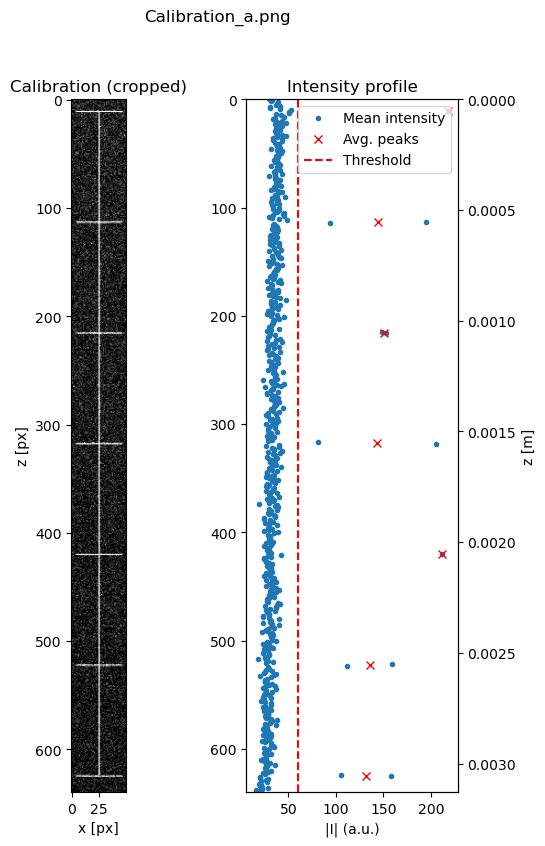

In [16]:
directory = 'PTV'
roi_calib = [200, 250, 30, 670]
calib_dist = 0.5 # [m]
threshold = 60

_, _, _, = etpof.calibrate_cameras(directory, roi_calib, calib_dist, threshold,
                                   peak_method='weighted_avg',
                                   file_prefix='Calibration_', 
                                   plot=[True, False], verbose=False,
                                   precision=7, units='m')


For each camera, we go through the following calibration steps:
1. We import the (grayscale) calibration image and manually inspect it to 
determine a suitable region of interest (ROI), containing the calibration 
pattern, but not the scale numbers and as little background noise as possible.
2. We assume that the background noise is the same throughout the image, and 
that the horizontal lines are, in fact, horizontal. _On closer inspection, the
 vertical line connecting the calibration lines has no angle: it follows a 
 single pixel column._
3. These two assumptions allow us to average the pixel values in the ROI in 
the horizontal direction to obtain a 1D "intensity profile" of the 
calibration image.
4. We then calculate the subpixel position of the peaks in the intensity 
profile by taking the average $z$ coordinate of all values around each peak 
that are larger than a set threshold. In the plot, these are the points to the 
right of the red dashed line. In calculating the average, we weigh each row by 
its intensity value. _Note that we could have also used fitted a Gaussian or 
another function to determine the exact peak, but this method already 
resulted in such a small error, and it did not seem to make much sense to fit
 a function to the 1 or 2 data points making up each peak._
5. Like in the previous homework assignment, we calculate all possible 
distances between the peaks (i.e., from the top line to the second one, one to three, 
one to four, etc.) and get a resolution value corresponding to each 
line-line combination by dividing between the distance in "real space". This 
distance is given by the calibration distance divided by the number of lines 
separating the two peaks.
6. Finally, we average the resolution values, weighted by the distance in 
real space, to obtain the final resolution value. This way, the longer 
distances, which contain a smaller error, weigh more heavily. The (weighted) 
standard deviation of the set of resolution values then gives us a measure of
 the error in the calibration.

Besides the resolution value, we also obtain an offset value, given by the 
average difference in position of the seven lines between the images of camera
 b) and a). This offset will later be used to align the images of the cameras.

In [29]:
res_avg, res_std, offset\
    = etpof.calibrate_cameras(directory, roi_calib, calib_dist, threshold)

print(f'\nResolution difference across the image: '
      f'{(abs(res_std[1] - res_std[0]) * 860 * 1000):.2f} mm.')

==> Calibration_a.png:
The average resolution is 0.0048892 m/px,
with a standard deviation of 0.0000018 m/px (0.038 %).
==> Calibration_b.png:
The average resolution is 0.0048895 m/px,
with a standard deviation of 0.0000017 m/px (0.034 %).
The offfset is -0.0000494 m.

Resolution difference across the image: 0.13 mm.


The results of the calibration are shown above, and are very similar for the 
two cameras at $4.89$ $\rm{mm/px}$. The standard error is also very 
similar, at $2$ $\rm{\mu m/px}$. The difference in resolution between the two
 cameras can only account for a total error of about $0.13$ $\rm{mm}$ across 
 the entire height of the images of about 0.13 mm.
 
In the next parts, we will use the resolution values corresponding to the 
camera with which the image was taken, and apply the offset (about to the 
coordinates
 in camera b). 

### 2) **Particle detection** (3 pts)

100%|██████████| 200/200 [00:00<00:00, 211.48it/s]


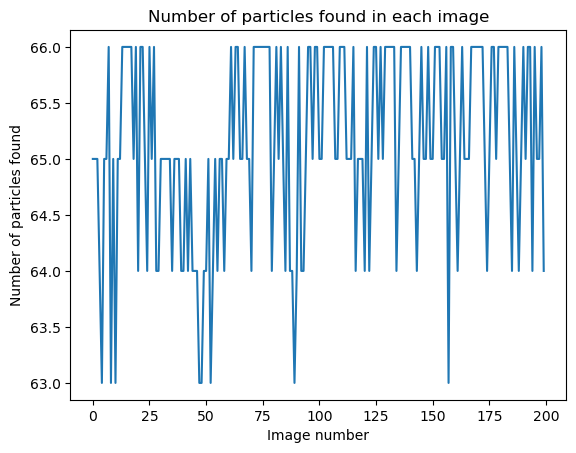

Found between 63 and 66 particles in each image, with a median of 65.0.


In [9]:
# For camera a
coords, intensities, coords_err, intensities_err, particles_found \
    = etpof.analyze_camera('PTV', 'a', res_avg[0], offset[0],
                           min_cnt_area=1, min_intensity=200, neighbor_dist=2.5,
                           box_margin=3, max_iter=5, verbose=True, plot=True)

100%|██████████| 200/200 [00:00<00:00, 239.33it/s]


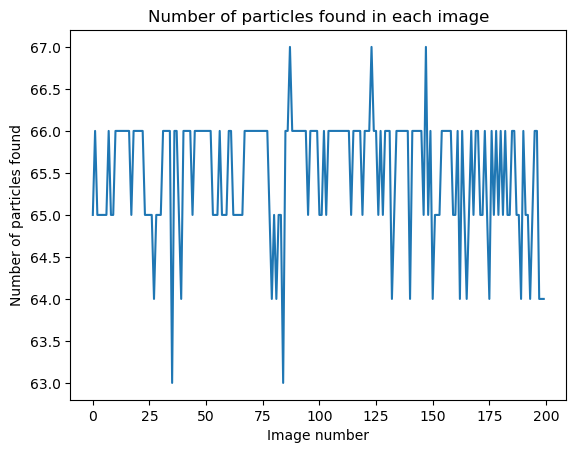

Found between 63 and 67 particles in each image, with a median of 66.0.


In [2]:
# For camera b
coords, intensities, coords_err, intensities_err, particles_found \
    = etpof.analyze_camera('PTV', 'b', res_avg[1], offset[1],
                           min_cnt_area=1, min_intensity=200, neighbor_dist=2.5,
                           box_margin=3, max_iter=5, verbose=True, plot=True)

## Appendix

Todo: add the etpof module here!